In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

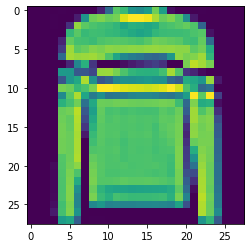

2


In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_images[5, :, :])
plt.show()
print(train_labels[5])

In [5]:
# Нормализируем данные
train_images = (train_images/127)-1
test_images = (test_images/127)-1

In [6]:
# Преобразуем картинки в вектора
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

#### 1. Опишите - какой результата получен в нейросети в зависимости от:

- числа нейронов в слое(для 2-хслойной сети),
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
- фиксируйте для тренировочного и тестового набора метрики accuracy.

In [7]:
# преобразуем таргет в бинарную переменную
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
import time

In [48]:
d ={'metric':['val_loss', 'val_accuracy']}
nn_data = pd.DataFrame(data=d)
nn_data.set_index('metric', inplace=True)

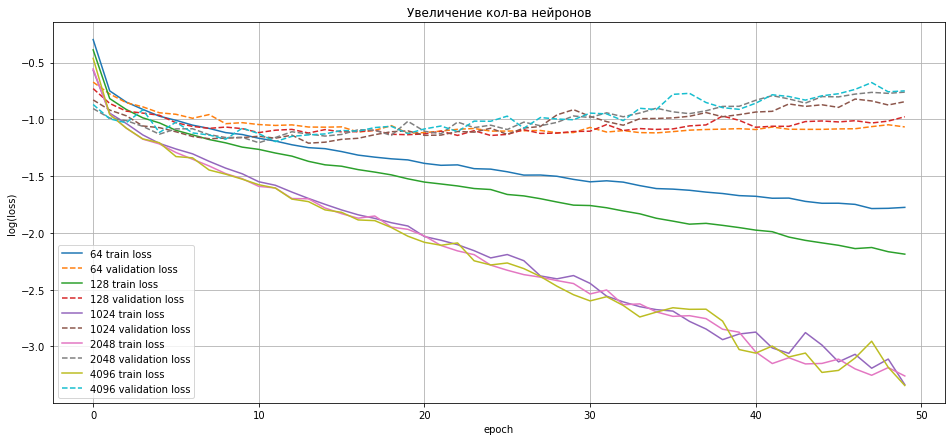

Wall time: 1min 34s


In [49]:
%%time
plt.figure(figsize=(16,7))

# число эпох
epochs = 50
# вектор для вывода результата
epoch = np.arange(epochs) 
# будем изменять количество нейронов в первом слое, кол-во нейронов выходного слоя оставим 10

for num_n in [64, 128, 1024, 2048, 4096]:

    model = Sequential([
        Dense(num_n, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    # Обучение модели
    hh = model.fit(train_images, 
                  y_train, 
                  epochs=epochs,
                  batch_size = 512, 
                  validation_split=0.2,
                  verbose=0)
    
    nn_data[f'{num_n}'] = model.evaluate(test_images, y_test, verbose=0)
    # добавление на график
    plt.plot(epoch, np.log(hh.history['loss']), linestyle='solid', label = f'{num_n} train loss')
    plt.plot(epoch, np.log(hh.history['val_loss']), linestyle='dashed', label=f'{num_n} validation loss')

plt.legend()
plt.grid('On')

plt.title('Увеличение кол-ва нейронов')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [50]:
nn_data

,64,128,1024,2048,4096
metric,,,,,
val_loss,0.381768,0.401538,0.47297,0.515487,0.520157
val_accuracy,0.879000,0.880300,0.89180,0.893500,0.894200


Если взять промежуток эпох до начала переобучения(примерно 10 эпох), то видно, что бОльшее количество нейронов показало лучшие результаты как на обучении, так и на тесте. Так же видно, что метрика accuracy на валидационной выборке показала себя лучше с бОльшим кол-вом нейронов. 

In [51]:
# сделаем 4 модели с разными кол-вами слоев и близким числом тренируемых параметров

model1 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(10, activation='softmax'),
])


model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model1.summary() 

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Будем держаться около 100.000 тренируемых параметров

In [52]:
model2 = Sequential([
    Dense(117, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax'),
])


model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model2.summary() 

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 117)               91845     
                                                                 
 dense_47 (Dense)            (None, 64)                7552      
                                                                 
 dense_48 (Dense)            (None, 10)                650       
                                                                 
Total params: 100,047
Trainable params: 100,047
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3 = Sequential([
    Dense(108, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax'),
])


model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model3.summary() 

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 108)               84780     
                                                                 
 dense_50 (Dense)            (None, 64)                6976      
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 10)                650       
                                                                 
Total params: 100,726
Trainable params: 100,726
Non-trainable params: 0
_________________________________________________________________


In [54]:
model4 = Sequential([
    Dense(80, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax'),
])


model4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model4.summary() 

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 80)                62800     
                                                                 
 dense_55 (Dense)            (None, 64)                5184      
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 64)              

In [55]:
models=[]
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)

In [66]:
d ={'metric':['val_loss', 'val_accuracy']}
nn_data_2 = pd.DataFrame(data=d)
nn_data_2.set_index('metric', inplace=True)

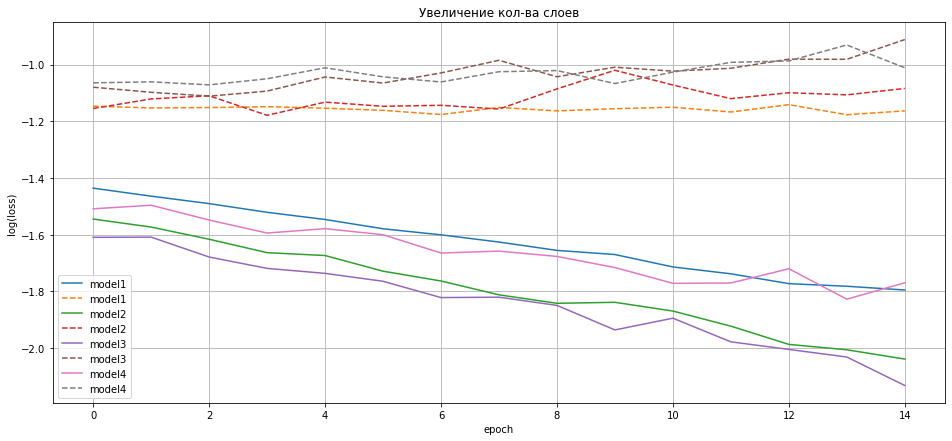

Wall time: 30.7 s


In [67]:
%%time
plt.figure(figsize=(16,7))

# число эпох
epochs = 15
# вектор для вывода результата
epoch = np.arange(epochs) 
# будем изменять количество нейронов в первом слое, кол-во нейронов выходного слоя оставим 10
i=1
for model in models:

    # Обучение модели
    hh = model.fit(train_images, 
                  y_train, 
                  epochs=epochs,
                  batch_size = 512, 
                  validation_split=0.2,
                  verbose=0)
    nn_data_2[f'{len(model.layers)} layers'] = model.evaluate(test_images, y_test, verbose=0)
    # добавление на график
    plt.plot(epoch, np.log(hh.history['loss']), '-', label = f'model{i}')
    plt.plot(epoch, np.log(hh.history['val_loss']), '--', label=f'model{i}')
    i+=1

plt.legend()
plt.grid('On')

plt.title('Увеличение кол-ва слоев')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [68]:
nn_data_2

,2 layers,3 layers,5 layers,11 layers
metric,,,,
val_loss,0.332238,0.376682,0.420768,0.394241
val_accuracy,0.885700,0.878200,0.874500,0.877500


Модель с 2 слоями показала себя лучше остальных. Модель с 11 и 5 слоями показали себя хуже. 

#### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

Как мы выяснили из тестов, лучшими моделями оказались модели с наибольшим количеством нейронов и 2 слоями. Поэтому сделаем похожую модель и проверим разные оптимизаторы.

In [73]:
d ={'metric':['val_loss', 'val_accuracy']}
nn_data_3 = pd.DataFrame(data=d)
nn_data_3.set_index('metric', inplace=True)

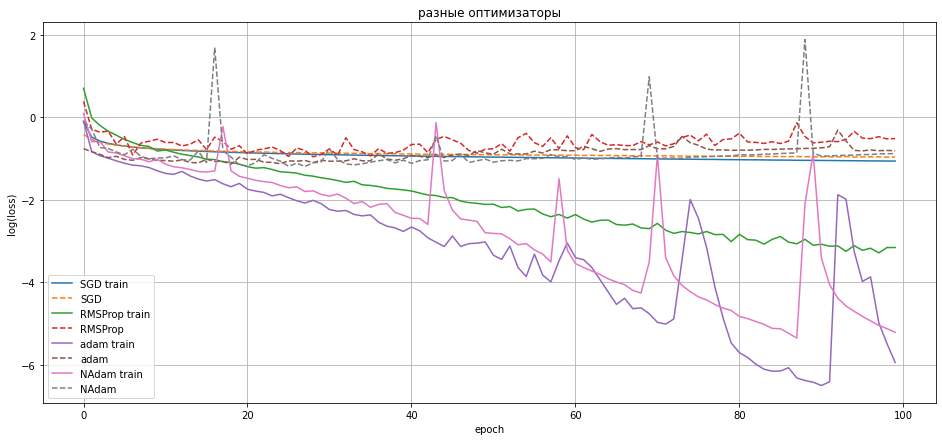

Wall time: 3min 8s


In [74]:
%%time
plt.figure(figsize=(16,7))

# число эпох
epochs = 100
# вектор для вывода результата
epoch = np.arange(epochs) 
# будем изменять количество нейронов в первом слое, кол-во нейронов выходного слоя оставим 10
i=1
for i_optim in ['SGD','RMSProp','adam','NAdam']:
    
    model = Sequential([
    Dense(4096, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),
])
    
    model.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    

    # Обучение модели
    hh = model.fit(train_images, 
                  y_train, 
                  epochs=epochs,
                  batch_size = 512, 
                  validation_split=0.2,
                  verbose=0)
    
    nn_data_3[f'{i_optim}'] = model.evaluate(test_images, y_test, verbose=0)
    # добавление на график
    plt.plot(epoch, np.log(hh.history['loss']), '-', label=f'{i_optim} train')
    plt.plot(epoch, np.log(hh.history['val_loss']), '--', label=f'{i_optim}')
    i+=1

plt.legend()
plt.grid('On')

plt.title('разные оптимизаторы')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [75]:
nn_data_3

,SGD,RMSProp,adam,NAdam
metric,,,,
val_loss,0.407698,0.665578,0.493162,0.461647
val_accuracy,0.855300,0.888100,0.896200,0.890300


Лучше всех себя проявил adam.

#### 3. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [90]:
# Использщуем для этого нашу последнюю обученную модель

from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images)
confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))
print('Confusion Matrix\n')
print(confusion)

313/313 [==============================] - 0s 1ms/step
Confusion Matrix

[[814   1  18  23   5   2 131   0   6   0]
 [  3 970   2  18   4   0   3   0   0   0]
 [ 21   1 829  15  73   0  60   0   1   0]
 [ 18   4  10 904  34   1  26   0   3   0]
 [  1   1  78  26 833   0  58   0   3   0]
 [  1   0   0   1   0 956   0  23   2  17]
 [109   2  78  27  64   0 705   0  15   0]
 [  0   0   0   0   0  20   0 954   0  26]
 [  3   0   4   5   0   3   5   5 975   0]
 [  0   0   0   0   0   6   1  30   0 963]]


Из таблицы видно, что сеть больше остальных неправильно классифицирцет объекты 0 и 6, как видно из визуализации ниже, сеть путает рубашки и футболки.

In [110]:
(t, tt), (test_imagesi, test_labelsi) = fashion_mnist.load_data()

In [114]:
test_imagesi = test_imagesi.reshape((-1, 784))

In [115]:
test_matrix = pd.DataFrame(data=test_imagesi)

In [116]:
test_matrix['target'] = test_labelsi

In [122]:
class_0 = test_matrix.loc[test_matrix['target']==0]
class_6 = test_matrix.loc[test_matrix['target']==6]

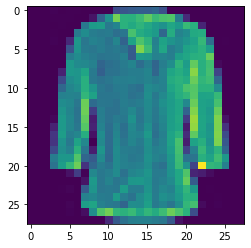

In [175]:
plt.imshow(class_6[0:1].values[0][0:784].reshape((28, 28)))
plt.show()


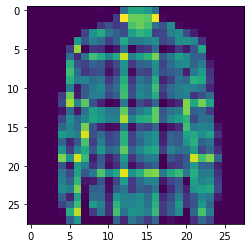

In [176]:
plt.imshow(class_6[1:2].values[0][0:784].reshape((28, 28)))
plt.show()


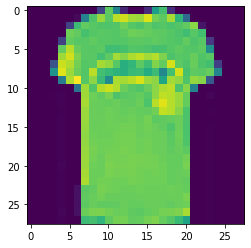

In [177]:
plt.imshow(class_0[0:1].values[0][0:784].reshape((28, 28)))
plt.show()

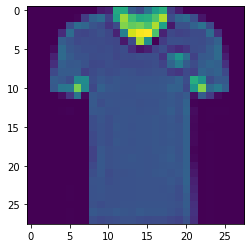

In [179]:
plt.imshow(class_0[3:4].values[0][0:784].reshape((28, 28)))
plt.show()

In [180]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.89      0.90      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.96      0.96      1000
           6       0.71      0.70      0.71      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

